#### Loading necessary packages

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("cardio_train.csv",sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 13)

#### Checking for null values

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values

#### Converting to appropriate data types

In [6]:
for col in df.columns:
    print(col,df[col].dtype)

id int64
age int64
gender int64
height int64
weight float64
ap_hi int64
ap_lo int64
cholesterol int64
gluc int64
smoke int64
alco int64
active int64
cardio int64


 All the column are in the appropriate data type

#### Creating a new column for age in years

In [7]:
df["age_y"]=round(df["age"]/365,0)

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,62.0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40.0
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60.0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,40.0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64.0


In [9]:
df["age_y"].dtype

dtype('float64')

#### Renaming columns

In [10]:
df=df.rename(columns={"ap_hi":"systolic_bp","ap_lo":"diastolic_bp"})

In [11]:
df.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio,age_y
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,62.0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40.0
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60.0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,40.0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64.0


#### Outlier Detection

In [12]:
numerical_column=df[["height","weight","systolic_bp","diastolic_bp","age_y","age"]]

In [13]:
import matplotlib.pyplot as plt

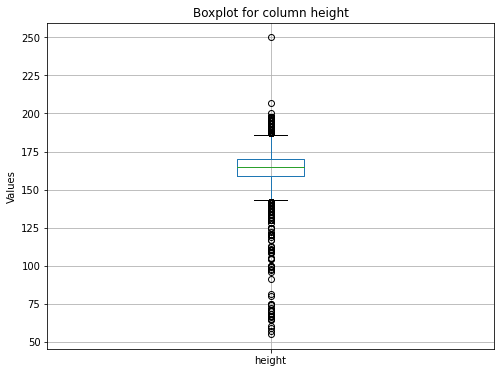

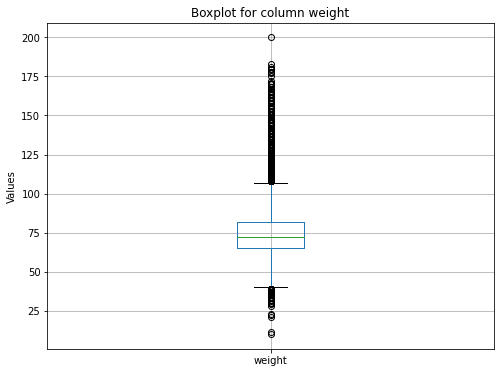

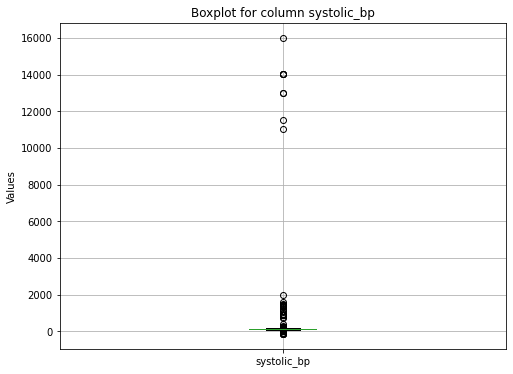

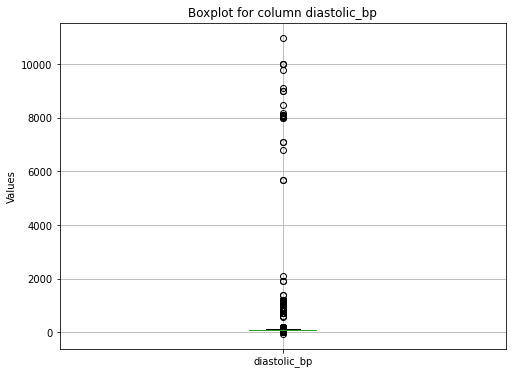

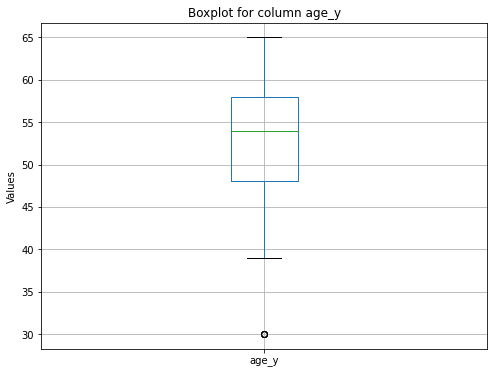

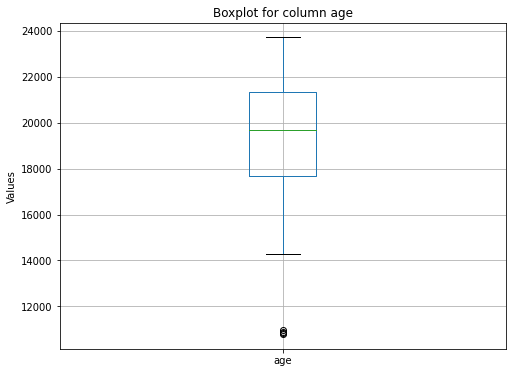

In [14]:
for col in numerical_column:
    plt.figure(figsize=(8,6))
    df.boxplot(column=col)
    plt.title(f"Boxplot for column {col}")
    plt.ylabel("Values")
    plt.show()

#### Z-score

In [15]:
from scipy import stats

In [16]:
df_copy=df.copy()

In [17]:
z_score=stats.zscore(df_copy)
abs_z_score=abs(z_score)
outliers=(abs_z_score >3).all(axis=1)
df_no_outliers_copy = df_copy[~outliers]

In [18]:
print(df_copy.shape)
print(df_no_outliers_copy.shape)

(69301, 14)
(69301, 14)


In [19]:
print(df_copy[outliers])

Empty DataFrame
Columns: [id, age, gender, height, weight, systolic_bp, diastolic_bp, cholesterol, gluc, smoke, alco, active, cardio, age_y]
Index: []


#### Inter Quartile Range

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_no_outliers = df[~outliers]

In [21]:
print(df_no_outliers.shape)
print(df.shape)

(37666, 14)
(69301, 14)


#### Exploratory Data Analysis

In [22]:
import seaborn as sns

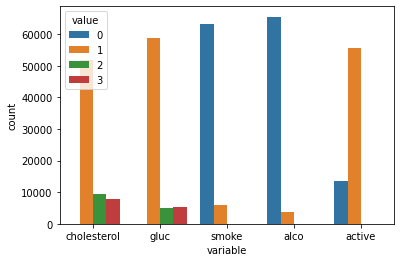

In [23]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

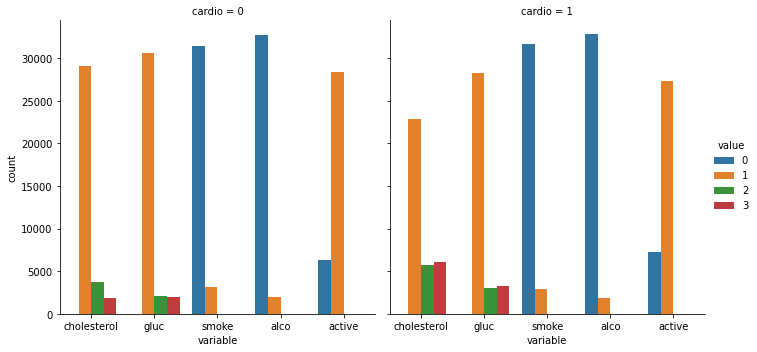

In [24]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

In [25]:
df.groupby('gender')['height'].mean()

gender
1    161.358659
2    169.952068
Name: height, dtype: float64

In [26]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [27]:
df['cardio'].value_counts(normalize=True)

0    0.500411
1    0.499589
Name: cardio, dtype: float64

In [28]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327557,0.172855
1,0.322925,0.176664


In [29]:
df.describe()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio,age_y
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,53.338177
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.765427
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [30]:
import numpy as np

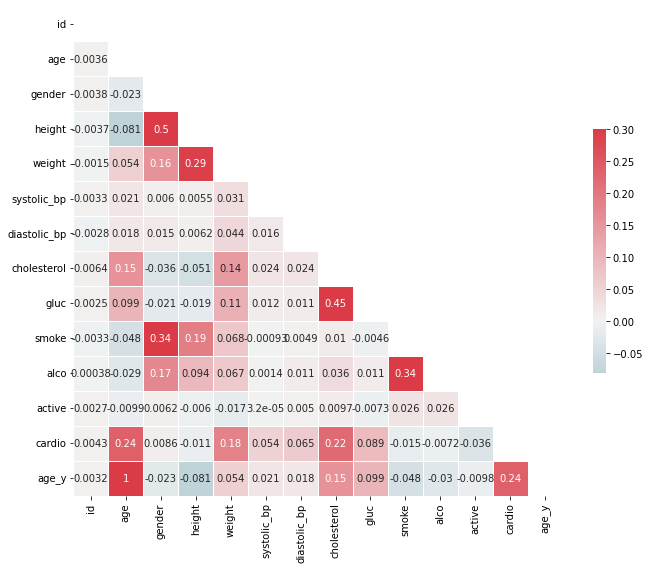

In [31]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Dropping the column id

In [32]:
df=df.drop(labels="id", axis=1)

#### Dropping duplicate values

In [33]:
df=df.drop_duplicates()

#### Train test split 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df[["age","gender", "height" , "weight" ,"systolic_bp", 'diastolic_bp','cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df["cardio"]
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size=0.2, random_state=33)

#### Classifier Algorithms

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [37]:
y_pred_test = logreg.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7068


#### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=33)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.71


#### 